In [1]:
f = open('/Users/devanshishah/Downloads/foxp2.fasta')


In [2]:
original_seq = {}

In [3]:

for line in f:
    line = line.rstrip()  
    if len(line) > 0 and line[0] == '>': 
        words = line.split()  
        name = words[0][1:]  
        original_seq[name] = '' 
    else:
        original_seq[name] += line 


In [8]:
import random


def random_mutations(sequence):
    dna = list(sequence)
    nbases = dna.count('n') + dna.count('N')
    x = len(dna)
    mut_prob = 0.01 * x
    
    for _ in range(int(mut_prob)): 
        mutation = random.choice("I,D,S")
        position = random.randint(0, x-1)
        basechange = random.choice("A,T,C,G")
        
        if mutation == "I":
            dna.insert(position, basechange)
        elif mutation == "D":
            dna.pop(position)
        elif mutation == "S":
            position = basechange
    
    return ''.join(dna)



for key in original_seq:
    mutated_seq = random_mutations(original_seq[key])
    #print(key,":\n",mutated_seq)
            
        
    

NG_007491.3:333506-612456 :
 ACAGACATGAAAGCTAACCGAGGACTTGAGAGACTCAAACTGGTGCTTTTGTCTCTCTCTCTCTGTCTTTCTCTCTCTCACACACACCTCACACACTCACACACATGCACACACACACATACACACACACAAAAATGAAGCACTTACTTTAGAAAGATTATGGTAAGCATGCTGGCTCAGTCTTGAACCTTTGTCACCCCTCACGTTGCACACCAAAGACATACCCTAGTGATTAAATGCTGATTTTGTGTACGATTGTCCACGGACGCCAAAACAATCACAGAGCTGCTTGATTTGTTTTAATTACCAGCACAAAATGCCATCAGTCTGGGACGTGATCGGGCAGAGGTGTACTCACAGTAGTGTAAATACTGCTGTAAATAGTTGTCTGATGGTGGCTTTGACAGTGAGCTAGCTTCTGAGTTTTCCCTTCTTTTTATACTGTTTTCTGTGCTGGCTTTTTTGAATCTTCCTAATTTTTCATCTCTTTAACAAACTCCTATGAAGTTGAAACCGGGAAGTTTGCTCTAACATTTCCAGAGAAGGTACGTTACTTTTTGCTAAGAGAATATCTGTAAGAGTTTAGAGAGGGGTGGGATTTTACGATTGCTTTACTGGTAGATTTGGCAATTGCTTTACTTTTTTTTTTTTCTGAGACTGTAGCTCATTGAAATGAACTAGAGCATTGTAT,CTGTTTGCGAGGGAAAAGCCGGGAGACCAG,ACACAGGAACTGTTTTTGATCTGTCAGTAGCGTAATGTAGATTTAAGCTATCACTAGTAAAGACAGCAAATAAAGAAGGCCTCTTTTGTATTAAAAAAAAATCTGCAAGATCTTGAGAAGAATAAAGACAGGGTTCCTGCTTTCATGGTTTGATAATAACCATGTCATCTTGCTTTTAGTAAATGCCCCAGTATGTGTCAGGGCGCAAGTTTTTGAAAAGGGAGTTTGACCACACGTTTGGGTGCCTC

In [13]:
def mutation_counter(original, mutated):
    substitutions = 0
    insertions = 0
    deletions = 0
    
    orig_len = len(original)
    mut_len = len(mutated)

    i, j = 0, 0
    
    while i < orig_len and j < mut_len:
        if original[i] != mutated[j]:  
            substitutions += 1
        i += 1
        j += 1
    
    
    if orig_len > mut_len:
        deletions += orig_len - mut_len
    
    
    elif mut_len > orig_len:
        insertions += mut_len - orig_len
    
    return substitutions, insertions, deletions


substitutions, insertions, deletions = mutation_counter(original_seq[key], mutated_seq)

print("No. of deletions:", deletions)
print("No. of substitutions:", substitutions)
print("No. of insertions:", insertions)


mutation_stats = {
    'substitutions': substitutions,
    'insertions': insertions,
    'deletions': deletions
}


No. of deletions: 15
No. of substitutions: 186213
No. of insertions: 0


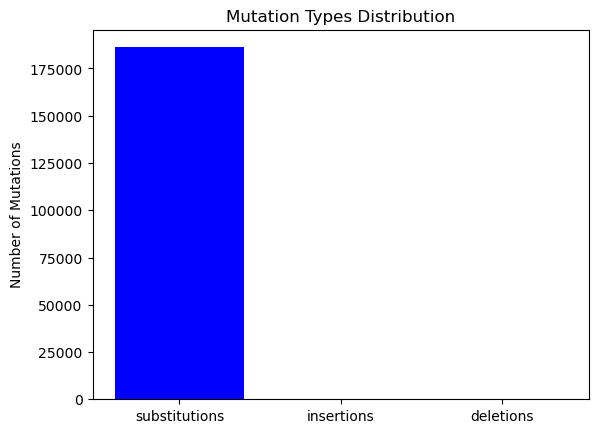

In [14]:
import matplotlib.pyplot as plt

categories = ['substitutions', 'insertions', 'deletions']
values = [mutation_stats[cat] for cat in categories]

plt.bar(categories, values, color=['blue', 'orange', 'green'])
plt.title('Mutation Types Distribution')
plt.ylabel('Number of Mutations')
plt.show()
